# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [30]:
data = tf.keras.preprocessing.image_dataset_from_directory('./images', labels='inferred', batch_size=32, color_mode='rgb', shuffle=True, seed=42)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [31]:
data_iterator=data.as_numpy_iterator()

In [32]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

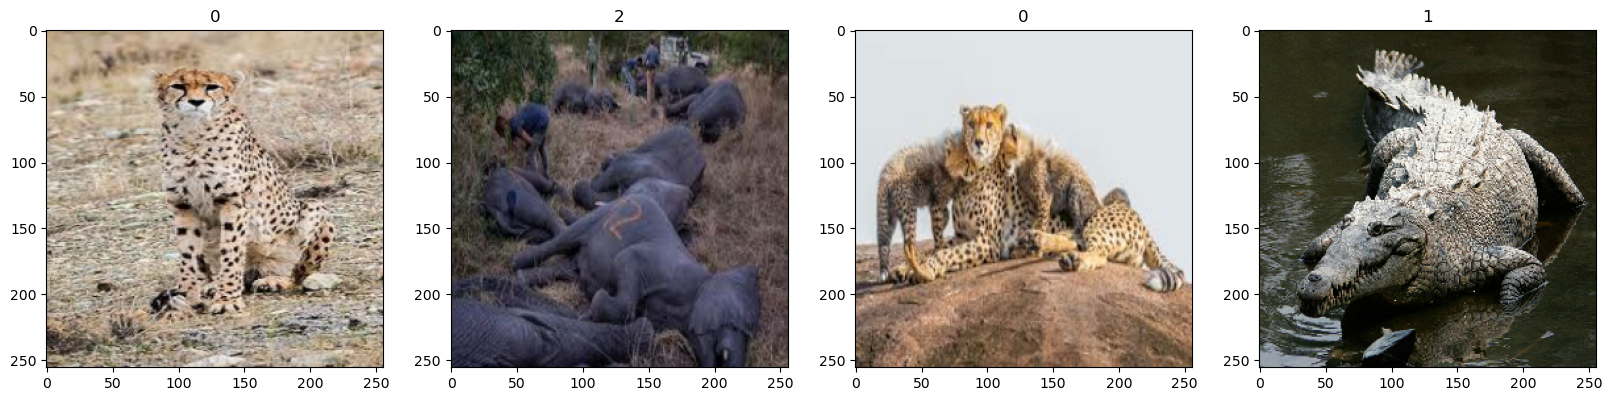

In [33]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [34]:
data=data.map(lambda x,y:(x/255,y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [38]:
#Your code here
no_of_batches = data.cardinality().numpy()
data_train = data.take(int(no_of_batches*0.8))
data_test = data.skip(int(no_of_batches*0.8))

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [40]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(256, 256, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

**Q.6** Compile your model

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [42]:
model.fit(data_train, epochs=10)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.2763 - loss: 1.8153
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 871ms/step - accuracy: 0.3714 - loss: 1.2809
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 803ms/step - accuracy: 0.5138 - loss: 1.1317
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 803ms/step - accuracy: 0.6347 - loss: 0.9126
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 913ms/step - accuracy: 0.8012 - loss: 0.5149
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9121 - loss: 0.2634
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 837ms/step - accuracy: 0.9612 - loss: 0.1432
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 953ms/step - accuracy: 0.9864 - loss: 0.0751
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 814ms/step - accuracy: 0.9838 - loss: 0.0487
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 801ms/step - accuracy: 0.9942 - loss: 0.0315


**Q.8** Test your code with test set

In [43]:
loss,accuracy=model.evaluate(data_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.8750 - loss: 0.6137


In [44]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8612716794013977


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**